## Initialization

In [1]:
import imageGeneration

## Generate batch

In [2]:
batch_size = 10
(image_batch, label_batch) = imageGeneration.get_batch(batch_size = batch_size)

Time taken for batch generation of size 10: 0.2293870449066162 s.


## Show images labels and prediction

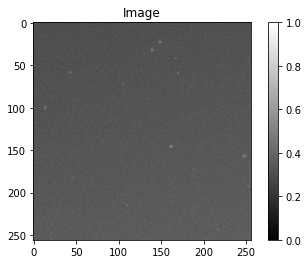

c:\users\david tonderski\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Test.png is a low contrast image
  del sys.path[0]
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


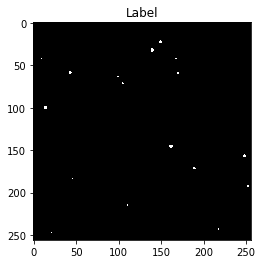

0.018990031877609774
0.090979598956895
22.952851593824096


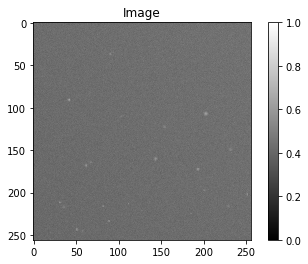

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


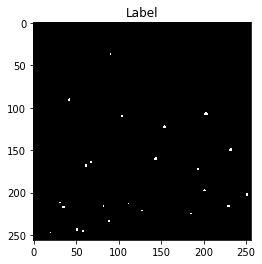

0.015438720968181328
0.090979598956895
34.726850715351496


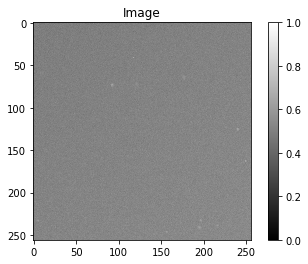

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


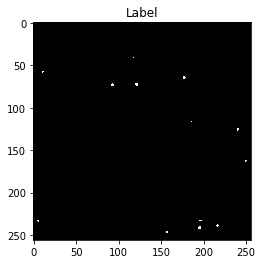

0.017871479605818728
0.090979598956895
25.915943023611703


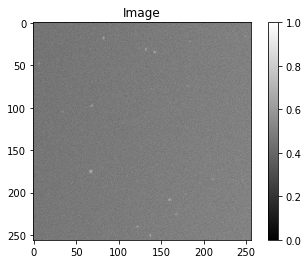

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


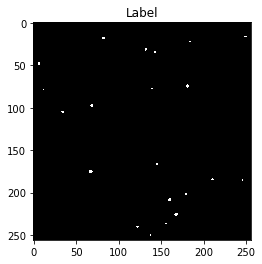

0.02012642735365641
0.090979598956895
20.434059619009584


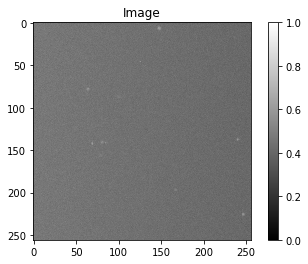

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


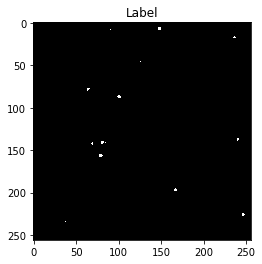

0.02238656922799485
0.090979598956895
16.516307170201536


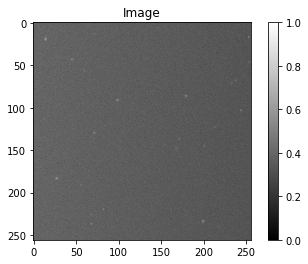

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


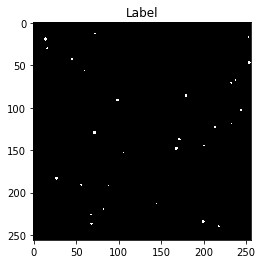

0.022724484054002115
0.090979598956895
16.028761726290046


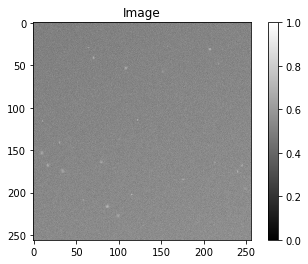

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


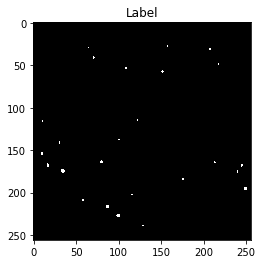

0.019748784642634857
0.090979598956895
21.223025132191136


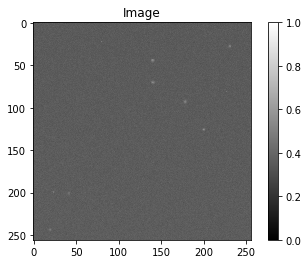

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


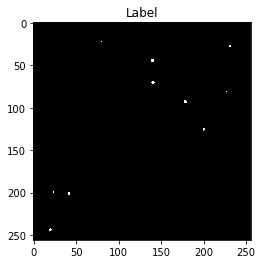

0.012825832331906402
0.090979598956895
50.31725258038215


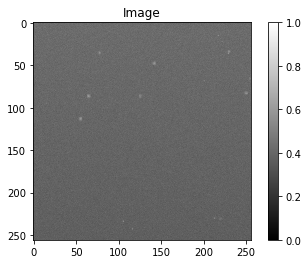

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


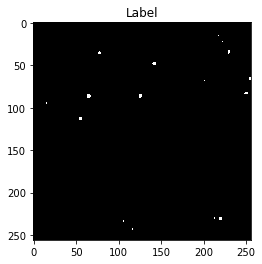

0.019939727961784504
0.090979598956895
20.818506880681387


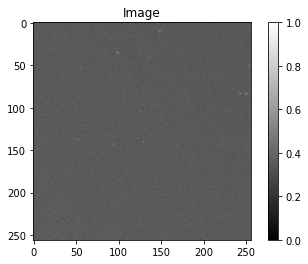

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


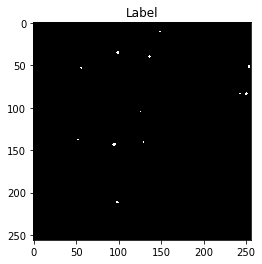

0.012554122534709432
0.090979598956895
52.518862315714586


IndexError: index 10 is out of bounds for axis 0 with size 10

In [3]:
from matplotlib import pyplot as plt
from numpy import ones, mean
import math
from skimage.io import imsave

for j in range(100):
    image = image_batch[j,:,:,0]
    label = label_batch[j,:,:,0]
    plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 1)## Show images and labels
    plt.colorbar()
    plt.title('Image')
    plt.show()
    imsave("Test.png", image)
    
    plt.imshow(label, cmap = 'gray')
    plt.title('Label')
    plt.show()
    RMS_noise = (mean((image-mean(image))**2))**(1/2)
    signal_standard_deviation = 0.15/(math.e**(1/2))
    print(RMS_noise)
    print(signal_standard_deviation)
    print((signal_standard_deviation/RMS_noise)**2)

## Create model and predict

In [8]:
model = unet.create_unet()
model.load_weights("unet_particle.hdf5")
prediction_batch = model.predict(image_batch)

1/1 [==============================] - 0s 13ms/step
[1.6979269981384277, 0.8905097246170044, 0.33704689145088196, 0.31125354766845703, 0.13220852613449097, 0.1345418095588684, 0.99420166015625]


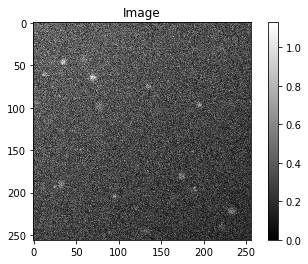

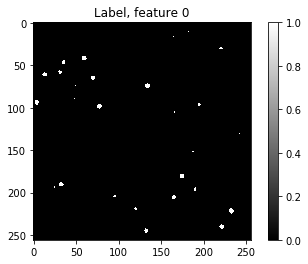

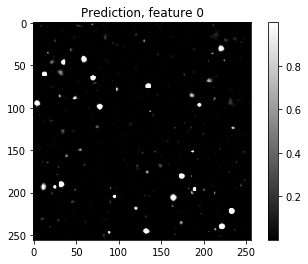

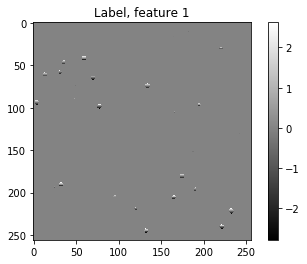

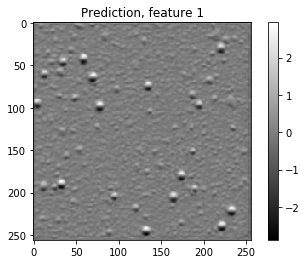

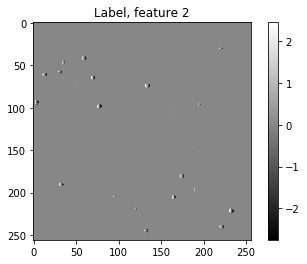

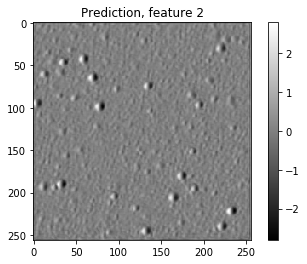

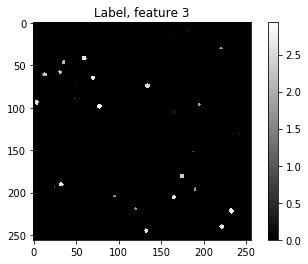

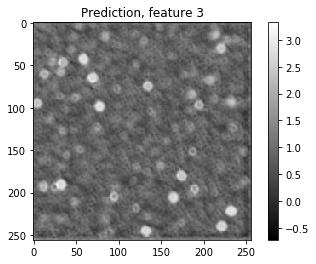

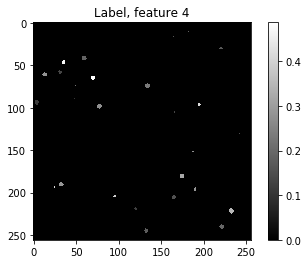

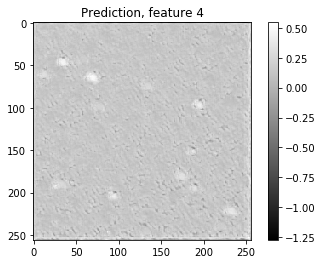

In [17]:
## Show images labels and prediction

from matplotlib import pyplot as plt
import numpy as np

for j in range(1,2):    
    image = image_batch[j,:,:,0]
    label = label_batch[j]
    prediction = prediction_batch[j]
    
    metrics = model.evaluate(image_batch[j:j+1], label_batch[j:j+1])
    print(metrics)
    
    plt.imshow(image, cmap = 'gray')
    plt.title('Image')
    plt.colorbar()
    plt.show()
    
    for feature_number in range(5):
        label_current_feature = label[:,:,feature_number]
        prediction_current_feature = prediction[:,:,feature_number]
        if(feature_number == 0):
             prediction_current_feature = 1/(1+np.exp(-prediction_current_feature))

        plt.imshow(label_current_feature, cmap = 'gray')
        plt.title('Label, feature %d' % feature_number)
        plt.colorbar()
        plt.show()
        
        plt.imshow(prediction_current_feature, cmap = 'gray')
        plt.title('Prediction, feature %d' % feature_number)
        plt.colorbar()
        plt.show()


## Show images labels and prediction

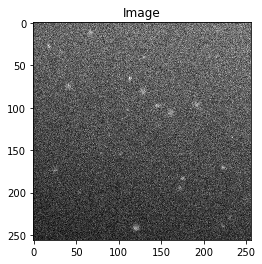

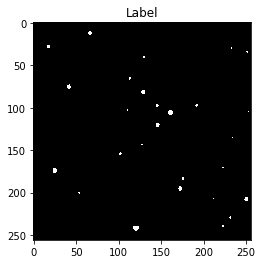

In [6]:
from matplotlib import pyplot as plt

for j in range(1):
    image = image_batch[j,:,:,0]
    label = label_batch[j,:,:,0]
    plt.imshow(image, cmap = 'gray')## Show images and labels
    plt.title('Image')
    plt.show()
    plt.imshow(label, cmap = 'gray')
    plt.title('Label')
    plt.show()